<a href="https://colab.research.google.com/github/bchiramani/Image_Compression_K_Means./blob/main/ImageCompression_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image compression with K-means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## K-means implementation

In [ ]:
def find_closest_centroids(X, centroids):
    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j]) 
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

def compute_centroids(X, idx, K):
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    for k in range(K):   
        points = X[idx == k]  
        centroids[k] = np.mean(points, axis = 0)
    
    return centroids

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids
    
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

## Load image

In [ ]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

### Visualize image

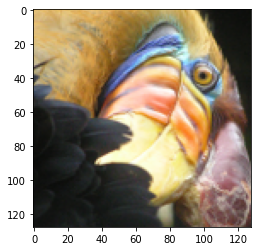

In [ ]:
# Visualizing the image
plt.imshow(original_img)

### Check the dimension of the variable

In [ ]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


We have a three-dimensional matrix original_img where

* the first two indices identify a pixel position.
* the third index represents red, green, or blue.

### Processing data

In [ ]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values. This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

## K-Means on image pixels

In [ ]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


## Compress the image
After finding the top  𝐾=16 colors to represent the image, we can now assign each pixel position to its closest centroid using the find_closest_centroids function.
We have significantly reduced the number of bits that are required to describe the image.
The original image required 24 bits for each one of the  128×128 pixel locations, resulting in total size of  128×128×24=393,216 bits.
The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location.
The final number of bits used is therefore  16×24+128×128×4=65,920
  bits, which corresponds to compressing the original image by about a factor of 6.

In [ ]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Text(0.5, 1.0, 'Compressed with 16 colours')

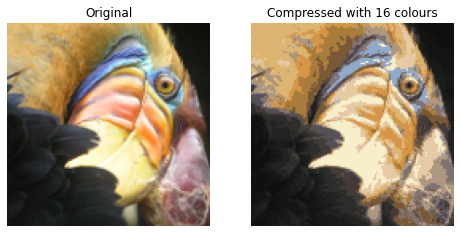

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)

